In [1]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
# Read data
data = pd.read_csv("fake_job_postings_cleaned_2.csv")

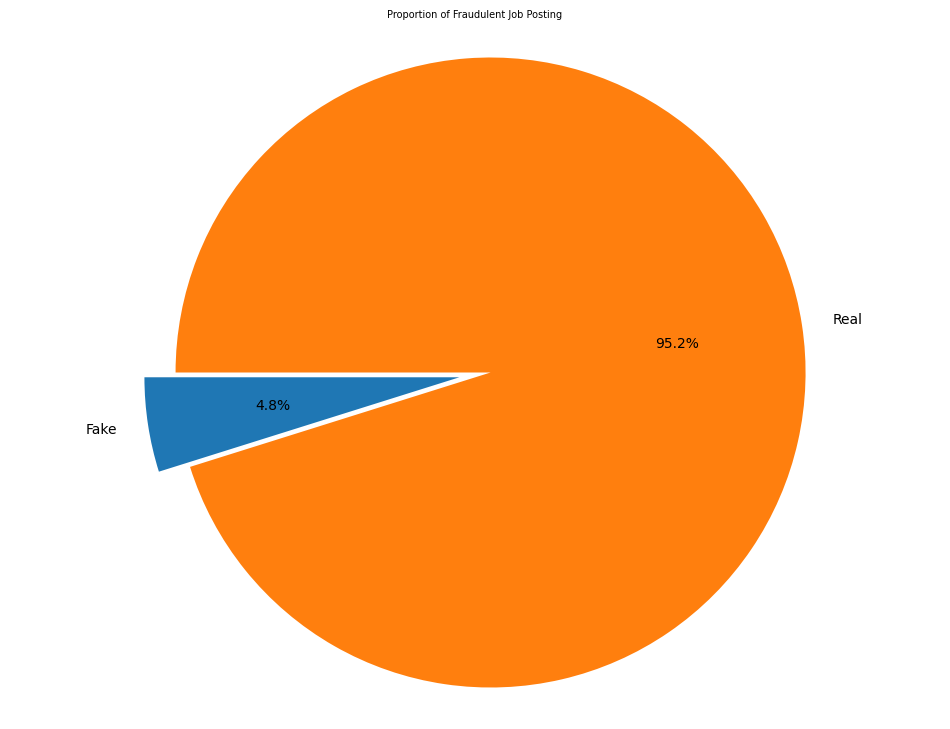

In [3]:
# Visualization of job postings

labels = 'Fake' ,'Real'

sizes = [data.fraudulent[data['fraudulent'] == 1].count() ,data.fraudulent[data['fraudulent'] == 0].count()]
explode =(0,0.1)

fig1 ,ax1 = plt.subplots(figsize =(12,9))
ax1.pie(sizes ,explode =explode, labels =labels, autopct ='%1.1f%%',startangle =180)

ax1.axis('equal')
plt.title("Proportion of Fraudulent internship Posting" ,size =7)
plt.show()

In [4]:
# Visualize Job postings by countries 

def split(location):
  l =location.split(',')
  return l[0]

data['country'] =data.location.apply(split)  

In [5]:
data['country'].nunique()

91

In [6]:
data['country'].value_counts()[:11]

US    10656
GB     2384
GR      940
CA      457
DE      383
        346
NZ      333
IN      276
AU      214
PH      132
NL      127
Name: country, dtype: int64

Text(0, 0.5, 'Number of Jobs')

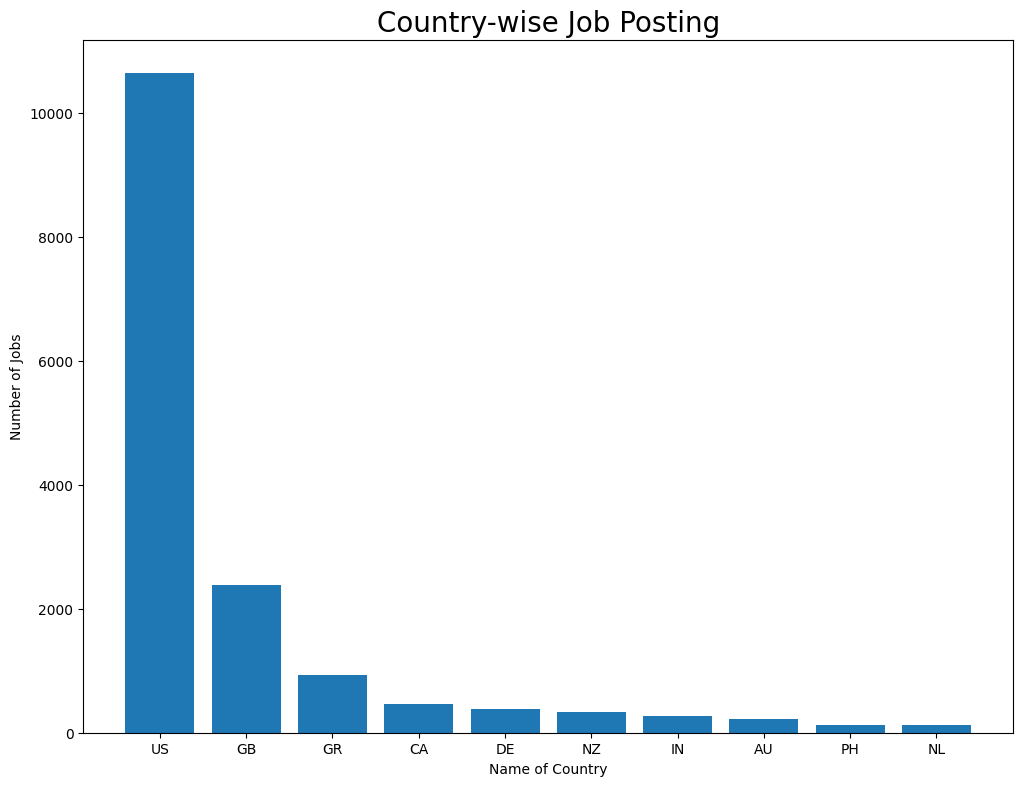

In [7]:
country =dict(data.country.value_counts()[:11])

del country[' ']
plt.figure(figsize=(12,9))

plt.title('Country-wise Job Posting',size=20)
plt.bar(country.keys(),country.values())

plt.xlabel('Name of Country')
plt.ylabel('Number of Jobs')

Text(0, 0.5, 'Number of Jobs')

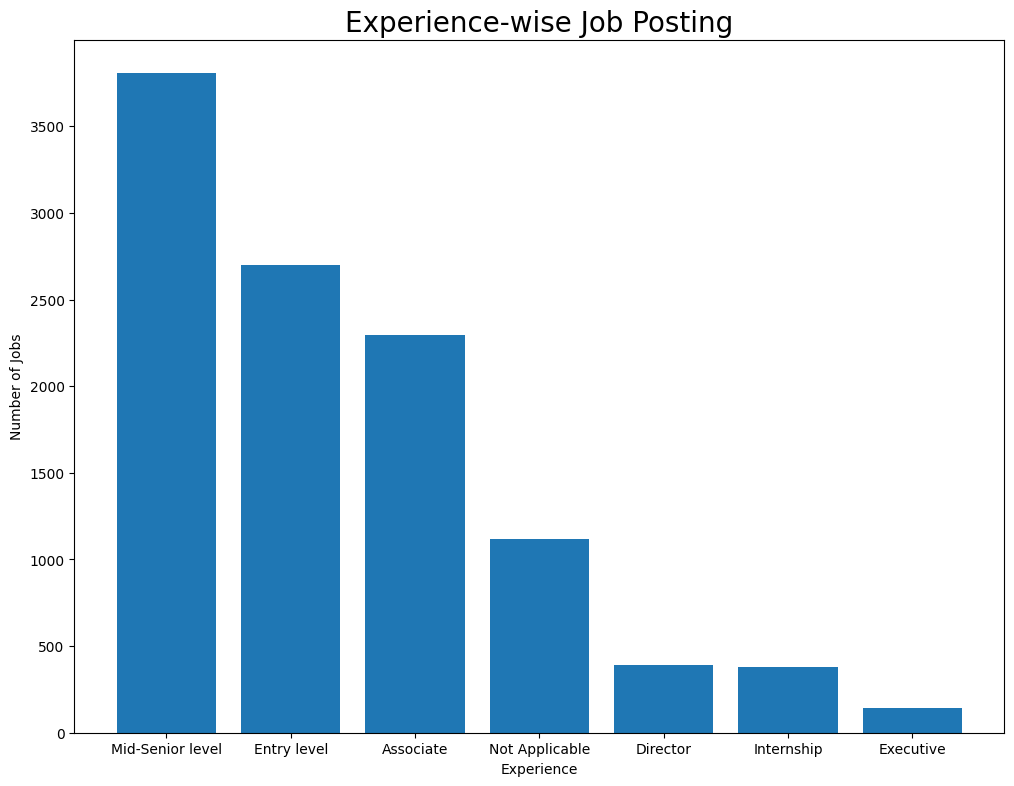

In [8]:
# Visualize Job posting by Experience 

experience =dict(data.required_experience.value_counts()[:11])

del experience[' ']
plt.figure(figsize=(12,9))

plt.title('Experience-wise Job Posting',size=20)
plt.bar(experience.keys(),experience.values())

plt.xlabel('Experience')
plt.ylabel('Number of Jobs')

Text(0, 0.5, 'Number of Jobs')

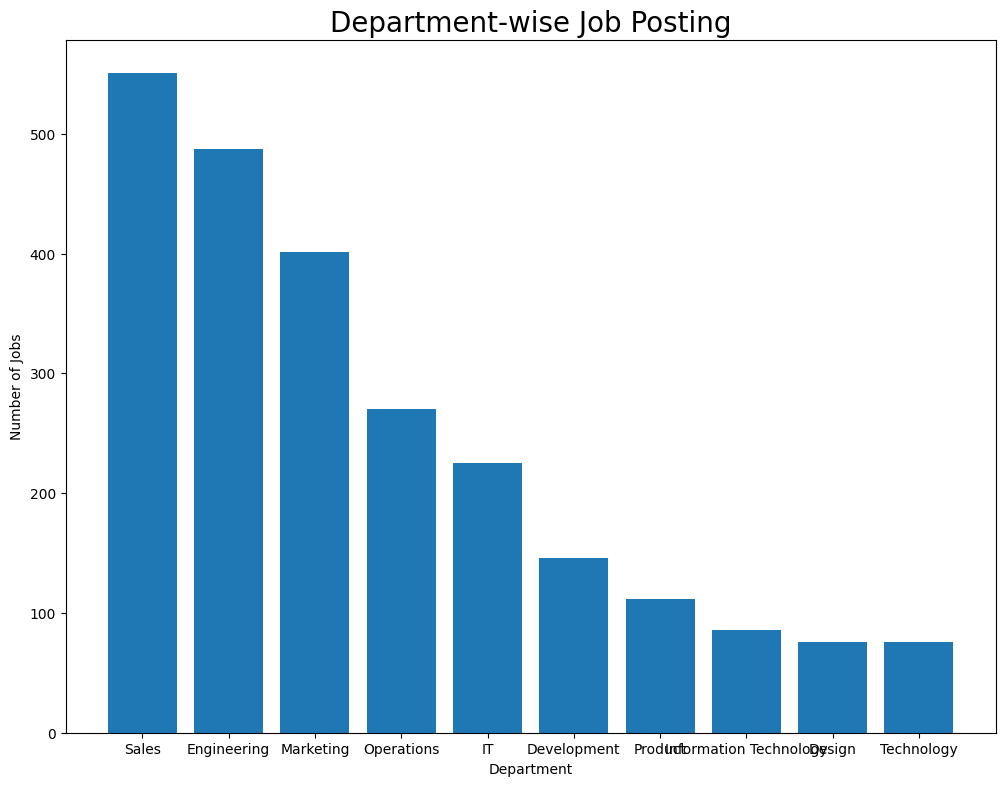

In [9]:
# Visualize Job posting by Department

department1 =dict(data.department.value_counts()[:11])

del department1[' ']
plt.figure(figsize=(12,9))

plt.title('Department-wise Job Posting',size=20) 
plt.bar(department1.keys(),department1.values())

plt.xlabel('Department')
plt.ylabel('Number of Jobs')

In [10]:
# TO find the fake job titles

data.title.value_counts()[:11]

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Name: title, dtype: int64

In [11]:
data[data.fraudulent == 1].title.value_counts()[:11]

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Data Entry                                                               9
Name: title, dtype: int64

In [12]:
data[data.fraudulent == 0].title.value_counts()[:11]

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Name: title, dtype: int64

In [13]:
data.columns

Index(['Unnamed: 0', 'title', 'location', 'department', 'company_profile',
       'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'country'],
      dtype='object')

In [14]:
data['text'] = data['title'] + ' '+ data['location'] + ' ' + data['department'] + ' ' + data['company_profile'] + ' '+ data['description'] + ' ' + data['requirements'] + ' ' + data['benefits'] + ' ' + data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['employment_type']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']

In [15]:
# save as CSV file
data.to_csv("fake_job_postings_cleaned_2.csv")

In [16]:
data.head()

,Unnamed: 0,fraudulent,text
0,0,0,"Marketing Intern US, NY, New York Marketing We..."
1,1,0,"Customer Service - Cloud Video Production NZ, ..."
2,2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,3,0,"Account Executive - Washington DC US, DC, Wash..."
4,4,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [17]:
# Check the frequency of Word in datsets

all_words = ' '.join([text for text in data['text']])

In [18]:
wordcloud = WordCloud(width = 600 ,height = 300, max_font_size = 120).generate(all_words)

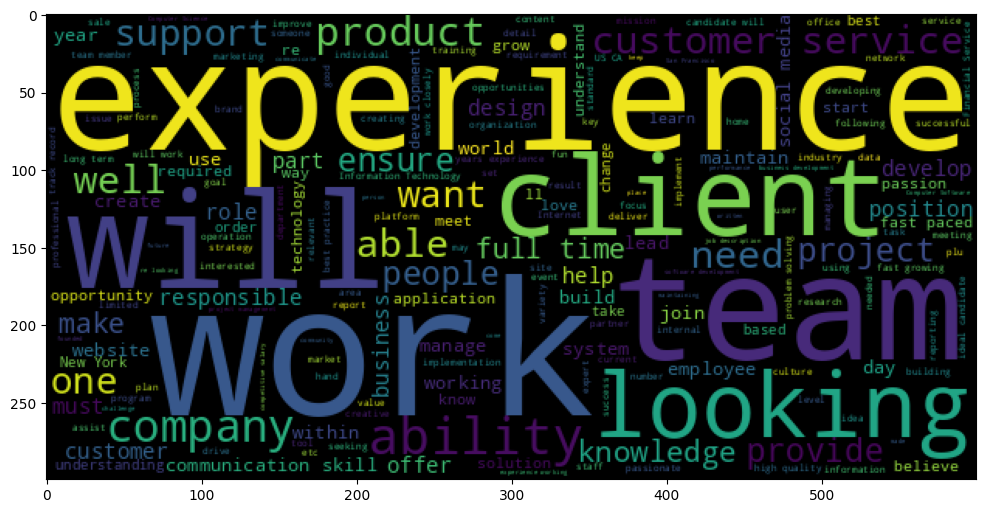

In [19]:
plt.figure(figsize =(12,9))

plt.imshow(wordcloud)
plt.show()

In [20]:
# frequency of word in real posting of jobs
real_post = ' '.join([text for text in data['text'][data['fraudulent']==0]])

In [21]:
wordcloud1 = WordCloud(width = 600 ,height = 300, max_font_size = 120).generate(real_post)

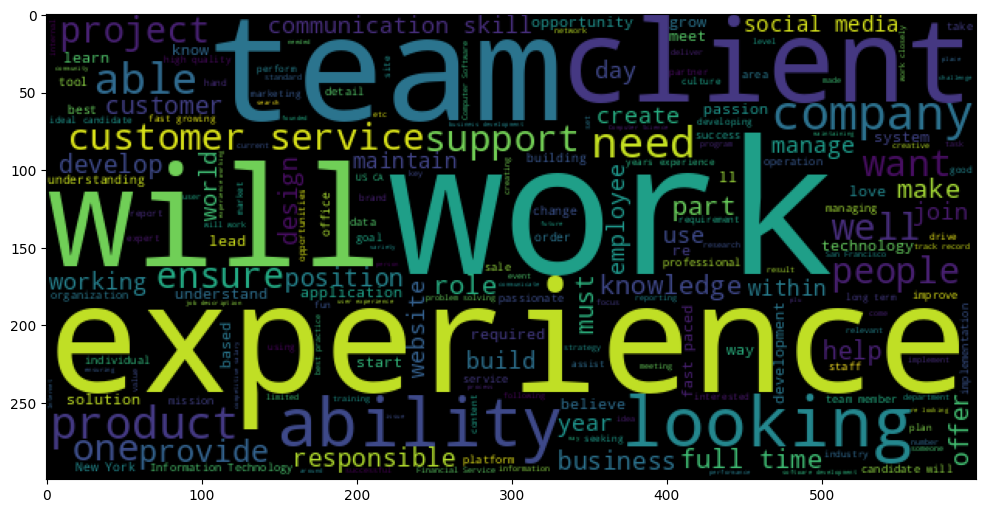

In [22]:
plt.figure(figsize =(12,9))

plt.imshow(wordcloud1)
plt.show()

In [23]:
# frequency of word in fake job postings
fake_post = ' '.join([text for text in data['text'][data['fraudulent'] == 1]])

In [24]:
wordcloud2 = WordCloud(width = 600 ,height = 300, max_font_size = 120).generate(fake_post)

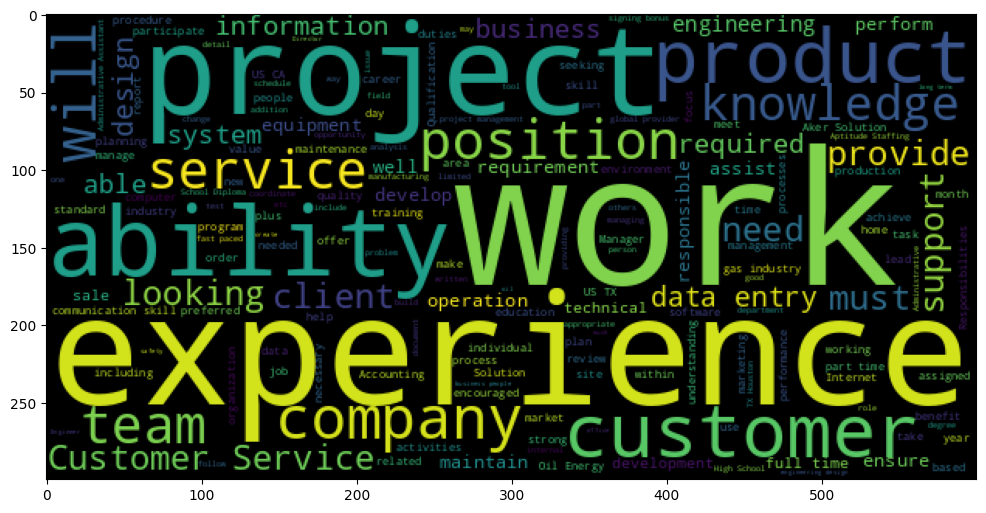

In [25]:
plt.figure(figsize =(12,9))

plt.imshow(wordcloud2)
plt.show()